# Sudoku miniproject

Below you will find the most elegant solution of sudoku solver coded by Peter Norvig. It's a good notation and implementation of two (simple) techniques that are enough to solve sudoku in a reasonable time.

You can find the original post here: http://norvig.com/sudoku.html

The best website about sudoku: http://www.sudokudragon.com/sudokutheory.htm

### Sudoku Notation and Preliminary Notions

First we have to agree on some notation. A Sudoku puzzle is a grid of 81 squares; the majority of enthusiasts label the columns 1-9, the rows A-I, and call a collection of nine squares (column, row, or box) a unit and the squares that share a unit the peers. A puzzle leaves some squares blank and fills others with digits, and the whole idea is:
A puzzle is solved if the squares in each unit are filled with a permutation of the digits 1 to 9.
That is, no digit can appear twice in a unit, and every digit must appear once. This implies that each square must have a different value from any of its peers. Here are the names of the squares, a typical puzzle, and the solution to the puzzle:

```
 A1 A2 A3| A4 A5 A6| A7 A8 A9    4 . . |. . . |8 . 5     4 1 7 |3 6 9 |8 2 5 
 B1 B2 B3| B4 B5 B6| B7 B8 B9    . 3 . |. . . |. . .     6 3 2 |1 5 8 |9 4 7
 C1 C2 C3| C4 C5 C6| C7 C8 C9    . . . |7 . . |. . .     9 5 8 |7 2 4 |3 1 6 
---------+---------+---------    ------+------+------    ------+------+------
 D1 D2 D3| D4 D5 D6| D7 D8 D9    . 2 . |. . . |. 6 .     8 2 5 |4 3 7 |1 6 9 
 E1 E2 E3| E4 E5 E6| E7 E8 E9    . . . |. 8 . |4 . .     7 9 1 |5 8 6 |4 3 2 
 F1 F2 F3| F4 F5 F6| F7 F8 F9    . . . |. 1 . |. . .     3 4 6 |9 1 2 |7 5 8 
---------+---------+---------    ------+------+------    ------+------+------
 G1 G2 G3| G4 G5 G6| G7 G8 G9    . . . |6 . 3 |. 7 .     2 8 9 |6 4 3 |5 7 1 
 H1 H2 H3| H4 H5 H6| H7 H8 H9    5 . . |2 . . |. . .     5 7 3 |2 9 1 |6 8 4 
 I1 I2 I3| I4 I5 I6| I7 I8 I9    1 . 4 |. . . |. . .     1 6 4 |8 7 5 |2 9 3 
```

Every square has exactly 3 units and 20 peers. For example, here are the units and peers for the square C2:

```
    A2   |         |                    |         |            A1 A2 A3|         |         
    B2   |         |                    |         |            B1 B2 B3|         |         
    C2   |         |            C1 C2 C3| C4 C5 C6| C7 C8 C9   C1 C2 C3|         |         
---------+---------+---------  ---------+---------+---------  ---------+---------+---------
    D2   |         |                    |         |                    |         |         
    E2   |         |                    |         |                    |         |         
    F2   |         |                    |         |                    |         |         
---------+---------+---------  ---------+---------+---------  ---------+---------+---------
    G2   |         |                    |         |                    |         |         
    H2   |         |                    |         |                    |         |         
    I2   |         |                    |         |                    |         |    
```

In [1]:
#notation

def cross(A, B):
    "Cross product of elements in A and elements in B."
    return [a+b for a in A for b in B]

digits   = '123456789'
rows     = 'ABCDEFGHI'
cols     = digits
squares  = cross(rows, cols)
unitlist = ([cross(rows, c) for c in cols] +
            [cross(r, cols) for r in rows] +
            [cross(rs, cs) for rs in ('ABC','DEF','GHI') for cs in ('123','456','789')])
units = dict((s, [u for u in unitlist if s in u]) 
             for s in squares)
peers = dict((s, set(sum(units[s],[]))-set([s]))
             for s in squares)

print(units['A1'])

[['A1', 'B1', 'C1', 'D1', 'E1', 'F1', 'G1', 'H1', 'I1'], ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9'], ['A1', 'A2', 'A3', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3']]


### Sudoku grid
Now that we have squares, units, and peers, the next step is to define the Sudoku playing grid. Actually we need two representations: First, a textual format used to specify the initial state of a puzzle; we will reserve the name grid for this. Second, an internal representation of any state of a puzzle, partially solved or complete; this we will call a values collection because it will give all the remaining possible values for each square. For the textual format (grid) we'll allow a string of characters with 1-9 indicating a digit, and a 0 or period specifying an empty square. All other characters are ignored (including spaces, newlines, dashes, and bars). So each of the following three grid strings represent the same puzzle:



In [2]:
# parser
def grid_values(grid):
    "Convert grid into a dict of {square: char} with '0' or '.' for empties."
    chars = [c for c in grid if c in digits or c in '0.']
    #assert len(chars) == 81
    return dict(zip(squares, chars))

def display(values):
    "Display these values as a 2-D grid."
    width = 1+max(len(values[s]) for s in squares)
    line = '+'.join(['-'*(width*3)]*3)
    for r in rows:
        print(''.join(values[r+c].center(width)+('|' if c in '36' else '') for c in cols))
        if r in 'CF': print(line)
    print()

# sample sudoku
grid1 = '003020600900305001001806400008102900700000008006708200002609500800203009005010300'
grid2 = "4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......"
display(grid_values(grid2))

4 . . |. . . |8 . 5 
. 3 . |. . . |. . . 
. . . |7 . . |. . . 
------+------+------
. 2 . |. . . |. 6 . 
. . . |. 8 . |4 . . 
. . . |. 1 . |. . . 
------+------+------
. . . |6 . 3 |. 7 . 
5 . . |2 . . |. . . 
1 . 4 |. . . |. . . 



### Parser
Now for values. One might think that a 9 x 9 array would be the obvious data structure. But squares have names like 'A1', not (0,0). Therefore, values will be a dict with squares as keys. The value of each key will be the possible digits for that square: a single digit if it was given as part of the puzzle definition or if we have figured out what it must be, and a collection of several digits if we are still uncertain. This collection of digits could be represented by a Python set or list, but I chose instead to use a string of digits (we'll see why later). So a grid where A1 is 7 and C7 is empty would be represented as {'A1': '7', 'C7': '123456789', ...}.

In [3]:
def parse_grid(grid):
    """Convert grid to a dict of possible values, {square: digits}, or
    return False if a contradiction is detected."""
    ## To start, every square can be any digit; then assign values from the grid.
    values = dict((s, digits) for s in squares)
    for s,d in grid_values(grid).items():
        if d in digits and not assign(values, s, d):
            return False ## (Fail if we can't assign d to square s.)
    return values

grid2 = "4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......"
sudoku_values = (grid_values(grid2))
                 
print(sudoku_values)


{'A1': '4', 'A2': '.', 'A3': '.', 'A4': '.', 'A5': '.', 'A6': '.', 'A7': '8', 'A8': '.', 'A9': '5', 'B1': '.', 'B2': '3', 'B3': '.', 'B4': '.', 'B5': '.', 'B6': '.', 'B7': '.', 'B8': '.', 'B9': '.', 'C1': '.', 'C2': '.', 'C3': '.', 'C4': '7', 'C5': '.', 'C6': '.', 'C7': '.', 'C8': '.', 'C9': '.', 'D1': '.', 'D2': '2', 'D3': '.', 'D4': '.', 'D5': '.', 'D6': '.', 'D7': '.', 'D8': '6', 'D9': '.', 'E1': '.', 'E2': '.', 'E3': '.', 'E4': '.', 'E5': '8', 'E6': '.', 'E7': '4', 'E8': '.', 'E9': '.', 'F1': '.', 'F2': '.', 'F3': '.', 'F4': '.', 'F5': '1', 'F6': '.', 'F7': '.', 'F8': '.', 'F9': '.', 'G1': '.', 'G2': '.', 'G3': '.', 'G4': '6', 'G5': '.', 'G6': '3', 'G7': '.', 'G8': '7', 'G9': '.', 'H1': '5', 'H2': '.', 'H3': '.', 'H4': '2', 'H5': '.', 'H6': '.', 'H7': '.', 'H8': '.', 'H9': '.', 'I1': '1', 'I2': '.', 'I3': '4', 'I4': '.', 'I5': '.', 'I6': '.', 'I7': '.', 'I8': '.', 'I9': '.'}


# Constraint Propagation - original code
The function parse_grid calls assign(values, s, d). We could implement this as values[s] = d, but we can do more than just that. Those with experience solving Sudoku puzzles know that there are two important strategies that we can use to make progress towards filling in all the squares:

(1) If a square has only one possible value, then eliminate that value from the square's peers. 

(2) If a unit has only one possible place for a value, then put the value there.

As an example of strategy (1) if we assign 7 to A1, yielding {'A1': '7', 'A2':'123456789', ...}, we see that A1 has only one value, and thus the 7 can be removed from its peer A2 (and all other peers), giving us {'A1': '7', 'A2': '12345689', ...}. As an example of strategy (2), if it turns out that none of A3 through A9 has a 3 as a possible value, then the 3 must belong in A2, and we can update to {'A1': '7', 'A2':'3', ...}. These updates to A2 may in turn cause further updates to its peers, and the peers of those peers, and so on. This process is called constraint propagation.

The function assign(values, s, d) will return the updated values (including the updates from constraint propagation), but if there is a contradiction--if the assignment cannot be made consistently--then assign returns False. For example, if a grid starts with the digits '77...' then when we try to assign the 7 to A2, assign would notice that 7 is not a possibility for A2, because it was eliminated by the peer, A1.

It turns out that the fundamental operation is not assigning a value, but rather eliminating one of the possible values for a square, which we implement with eliminate(values, s, d). Once we have eliminate, then assign(values, s, d) can be defined as "eliminate all the values from s except d".

In [4]:
def assign(values, s, d):
    """Eliminate all the other values (except d) from values[s] and propagate.
    Return values, except return False if a contradiction is detected."""
    other_values = values[s].replace(d, '')
    if all(eliminate(values, s, d2) for d2 in other_values):
        return values
    else:
        return False

def eliminate(values, s, d):
    """Eliminate d from values[s]; propagate when values or places <= 2.
    Return values, except return False if a contradiction is detected."""
    if d not in values[s]:
        return values ## Already eliminated
    values[s] = values[s].replace(d,'')
    ## (1) If a square s is reduced to one value d2, then eliminate d2 from the peers.
    if len(values[s]) == 0:
        return False ## Contradiction: removed last value
    elif len(values[s]) == 1:
        d2 = values[s]
        if not all(eliminate(values, s2, d2) for s2 in peers[s]):
            return False
    ## (2) If a unit u is reduced to only one place for a value d, then put it there.
    for u in units[s]:
        dplaces = [s for s in u if d in values[s]]
        if len(dplaces) == 0:
            return False ## Contradiction: no place for this value
        elif len(dplaces) == 1:
            # d can only be in one place in unit; assign it there
            if not assign(values, dplaces[0], d):
                return False
    return values

### Test run

In [5]:
grid2 = "4.....8.5.3..........7......2.....6.....8.4......1.......6.3.7.5..2.....1.4......"
sudoku_values = (parse_grid(grid2))
display(sudoku_values)




   4      1679   12679  |  139     2369    269   |   8      1239     5    
 26789     3    1256789 | 14589   24569   245689 | 12679    1249   124679 
  2689   15689   125689 |   7     234569  245689 | 12369   12349   123469 
------------------------+------------------------+------------------------
  3789     2     15789  |  3459   34579    4579  | 13579     6     13789  
  3679   15679   15679  |  359      8     25679  |   4     12359   12379  
 36789     4     56789  |  359      1     25679  | 23579   23589   23789  
------------------------+------------------------+------------------------
  289      89     289   |   6      459      3    |  1259     7     12489  
   5      6789     3    |   2      479      1    |   69     489     4689  
   1      6789     4    |  589     579     5789  | 23569   23589   23689  



# Constraint Propagation - code refactoring

Try to decompose* eliminate function into smaller one.
* Decomposition is a process by which you can break down one complex function into multiple smaller functions. By doing this, you can solve for functions in shorter, easier-to-understand pieces.

In [6]:
# todo

def eliminate(values):
    """
    Iterate through all squares and every time 
       if there is a square with one value, 
       then eliminate this value from the peers

    input: sudoku in dictionary form
    output: resulting sudoku in dictionary form
    """
    for x in values.keys():
        if len(values[x]) == 0:
            return False
        elif len(values[x]) == 1:            
            for peer in peers[x]:
                values[peer] = values[peer].replace(values[x],'')
    return values

def only_choice(values):
    """
    Iterate through all squares and every time
        if there is a square with a value that only fits in one square, 
        assign the value to this square

    input: sudoku in dictionary form
    output: resulting sudoku in dictionary form
    """
    digits   = '123456789'
    rows     = 'ABCDEFGHI'
    for x in values.keys():
        if len(values[x]) == 0:
            return False
        elif len(values[x]) != 1:
            for numbers in values[x]:
                letter = x[0]
                number = x[1]

                rows_ind = rows.find(letter)
                rows_ind = rows_ind - (rows_ind%3)
                digits_ind = digits.find(number)
                digits_ind = digits_ind - (digits_ind%3)
                unit = cross(rows[rows_ind : rows_ind+3], digits[digits_ind : digits_ind+3])
                
                for unit in units[x]:
                    not_found = digits[:]
                    for sqr in unit:
                        if sqr != x:
                            not_found = not_found.translate(str.maketrans('', '', values[sqr]))
                    if len(not_found)==1 and not_found in values[x]:
                        values[x] = not_found
                        break
    return values

def solve_sudoku(values):
    """
    Solve sudoku using eliminate() and only_choice()
    
    input: sudoku in dictionary form
    output: resulting sudoku in dictionary form
    """
    previous_values = values
    while 1:
        values = eliminate(values)
        values = only_choice(values)
        if(previous_values == values):
            #if there is no progress, just give up
            return values
    return values

display(solve_sudoku(sudoku_values))

   4      1679   12679  |  139     2369    269   |   8      1239     5    
 26789     3    1256789 | 14589   24569   245689 | 12679    1249   124679 
  2689   15689   125689 |   7     234569  245689 | 12369   12349   123469 
------------------------+------------------------+------------------------
  3789     2     15789  |  3459   34579    4579  | 13579     6     13789  
  3679   15679   15679  |  359      8     25679  |   4     12359   12379  
 36789     4     56789  |  359      1     25679  | 23579   23589   23789  
------------------------+------------------------+------------------------
  289      89     289   |   6      459      3    |  1259     7     12489  
   5      6789     3    |   2      479      1    |   69     489     4689  
   1      6789     4    |  589     579     5789  | 23569   23589   23689  



# Naked twins
http://www.sudokudragon.com/tutorialnakedtwins.htm


In [7]:
assignments = []
def assign_value(values, box, value):
    """
    Please use this function to update your values dictionary!
    Assigns a value to a given box. If it updates the board record it.
    """
    values[box] = value
    if len(value) == 1:
        assignments.append(values.copy())
    return values


def naked_twins(values):
    """
    eliminate values using the naked twins strategy
    
    input: A sudoku in dictionary form.
    output: The resulting sudoku in dictionary form.
    """
    #Select boxes with 2 entries
    potential_twins = [box for box in values.keys() if len(values[box]) == 2]
    #Collect boxes that have the same elements
    naked_twins = [[box1,box2] for box1 in potential_twins \
                    for box2 in peers[box1] \
                    if set(values[box1])==set(values[box2]) ]

    for i in range(len(naked_twins)):
        box1 = naked_twins[i][0]
        box2 = naked_twins[i][1]
        #Compute intersection of peers
        peers1 = set(peers[box1])
        peers2 = set(peers[box2])
        peers_int = peers1 & peers2
        #Delete the two digits in naked twins from all common peers.
        for peer_val in peers_int:
            if len(values[peer_val])>2:
                for rm_val in values[box1]:
                    values = assign_value(values, peer_val, values[peer_val].replace(rm_val,''))
    return values

def solve_with_twins(values):
    """
    Solve sudoku using eliminate() and only_choice()
    
    input: sudoku in dictionary form
    output: resulting sudoku in dictionary form
    """
    previous_values = values
    while 1:
        values = eliminate(values)
        values = only_choice(values)
        values = naked_twins(values)
        if(previous_values == values): 
            return values
        
        
display(solve_with_twins(sudoku_values))

   4      1679   12679  |  139     2369    269   |   8      1239     5    
 26789     3    1256789 | 14589   24569   245689 | 12679    1249   124679 
  2689   15689   125689 |   7     234569  245689 | 12369   12349   123469 
------------------------+------------------------+------------------------
  3789     2     15789  |  3459   34579    4579  | 13579     6     13789  
  3679   15679   15679  |  359      8     25679  |   4     12359   12379  
 36789     4     56789  |  359      1     25679  | 23579   23589   23789  
------------------------+------------------------+------------------------
  289      89     289   |   6      459      3    |  1259     7     12489  
   5      6789     3    |   2      479      1    |   69     489     4689  
   1      6789     4    |  589     579     5789  | 23569   23589   23689  



In [11]:
import time

#make sudoku to solving
def make_sudoku(values,replace_par):
    gridvalues = []
    for x in values:
        xgrid = grid_values(x)
        for grid in xgrid:
            if xgrid[grid] == replace_par:
                xgrid[grid] = "123456789"
        gridvalues.append(xgrid)
    return gridvalues

def check_if_solved(sudoku):
    for x in sudoku:
        if (len(sudoku[x]) != 1):
            return False
    return True

def read_file(filename,split_par):
    return open(filename).read().split(split_par)

def make_stats(filename, split_el, rep_el, solver="normal"):
    time_list = []
    if_solved = []
    file = read_file(filename,split_el)
    sudoku_values = make_sudoku(file,rep_el)
    for x in sudoku_values:
        start_time = time.clock()
        if solver == "twins":
            solved_sudoku = solve_with_twins(x)
        else:
            solved_sudoku = solve_sudoku(x)
        time_list.append(time.clock()-start_time)
        if_solved.append(check_if_solved(solved_sudoku))      
      
    avg_time = sum(time_list)/len(time_list)
    print("Avg time: ", avg_time, "s")
    print("Max time: ", max(time_list), "s")
    
    print("Solved of", filename, ": ", if_solved.count(True), "/", len(if_solved), "sudoku -", sum(if_solved)/len(if_solved) * 100, "%" )
    
    return avg_time

time_normal = []
time_twins = []
time_twins.append(make_stats("easiest.txt", "\n", ".", "twins"))
print("\n")
time_twins.append(make_stats("easy50.txt", "========", "0", "twins"))
print("\n")
time_twins.append(make_stats("top95.txt", "\n", ".", "twins"))
print("\n")
time_normal.append(make_stats("easiest.txt", "\n", "."))
print("\n")
time_normal.append(make_stats("easy50.txt", "========", "0"))
print("\n")
time_normal.append(make_stats("top95.txt", "\n", "."))


Avg time:  0.0018809933056852894 s
Max time:  0.00234487860367949 s
Solved of easiest.txt :  1 / 6 sudoku - 16.666666666666664 %


Avg time:  0.0074721330143880495 s
Max time:  0.01307663918795754 s
Solved of easy50.txt :  0 / 50 sudoku - 0.0 %


Avg time:  0.010296131885852775 s
Max time:  0.012359053788934204 s
Solved of top95.txt :  0 / 95 sudoku - 0.0 %


Avg time:  0.0017739165370448025 s
Max time:  0.0022804272835159622 s
Solved of easiest.txt :  1 / 6 sudoku - 16.666666666666664 %


Avg time:  0.0067449661261105125 s
Max time:  0.011565522566790776 s
Solved of easy50.txt :  0 / 50 sudoku - 0.0 %


Avg time:  0.010198108838812316 s
Max time:  0.013240025337168504 s
Solved of top95.txt :  0 / 95 sudoku - 0.0 %


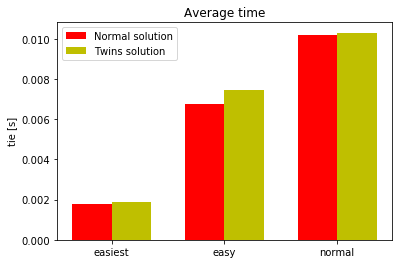

In [12]:
#show chart
import numpy as np
import matplotlib.pyplot as plt

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, time_normal, width, color='r')
rects2 = ax.bar(ind + width, time_twins, width, color='y')

# add some text for labels, title and axes ticks
ax.set_ylabel('tie [s]')
ax.set_title('Average time')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('easiest','easy','normal'))

ax.legend((rects1[0], rects2[0]), ('Normal solution', 'Twins solution'))
plt.show()

### Conclusion

The algorithm doesn't work very well, it doesn't resolve sudoku in perfect way. There are often no solutions for only 4-5 places. The solution need function to predict where it could be the number if the same number repeat in few places. Solution could solve the problem only if the sudoku is the easiest, for children. The algorithm works faster when the sudoku is easier. The speed between the methods is slower for the twins method, but it achieves better result.